##1. Data

##1.1 Load Data


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.getcwd()
os.chdir('/content/drive/My Drive/project/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


##1. 2 Data Processing 

###1.2.1 Dummify Dependent Variable

In [3]:
Raintomorrow = []
for i in df['RainTomorrow']:
    if i == 'No':
        i = 0
    else:
        i = 1
    Raintomorrow.append(i)

#print(Raintomorrow)
df['RainTomorrow'] = Raintomorrow
df.head()   

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,0
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,0
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,0
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,0
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,0


###1.2.2 Delete Volumns (More than 50% of NaN)

In [4]:
df.shape[0]
df['Location'].unique().tolist()
ismorenan = df.isna().sum()/df.shape[0]
print(ismorenan)

Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64


In [5]:
coldel = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
df.drop(coldel,axis=1,inplace=True)
df.columns.values.tolist()
df.shape

(142193, 20)

###1.2.3 Delete Rows (Rows with any NaN value)

In [6]:
df = df.dropna(axis=0, how='any')
df.shape

(112925, 20)

###1.2.4 Plot Number of Days (RainTomorrow & No RainTomorrow)

(array([87906.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25019.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

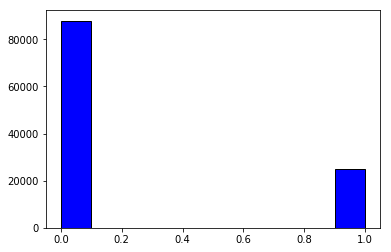

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df['RainTomorrow'], facecolor='blue', edgecolor='black')

###1.2.5 Plot Number of Days (RainTomorrow & No RainTomorrow) of Different Locations

In [0]:
df1 = df.copy()
df1.set_index(['Location'],inplace=True)
df1_index=df1.index.unique().tolist()

In [0]:
loc_rain = []
for idx in df1_index:
    loc_rain.append(df1.loc[idx]['RainTomorrow'].sum())

loc_total = []
for idx in df1_index:
    loc_total.append(df1.loc[idx]['RainTomorrow'].count())

    
rain = np.array(loc_rain)
total = np.array(loc_total)
norain = total - rain

#loc_norain = list(set(loc_total) - set(loc_rain))
#print(len(loc_rain))
#print(len(norain))
#print(len(loc_total))

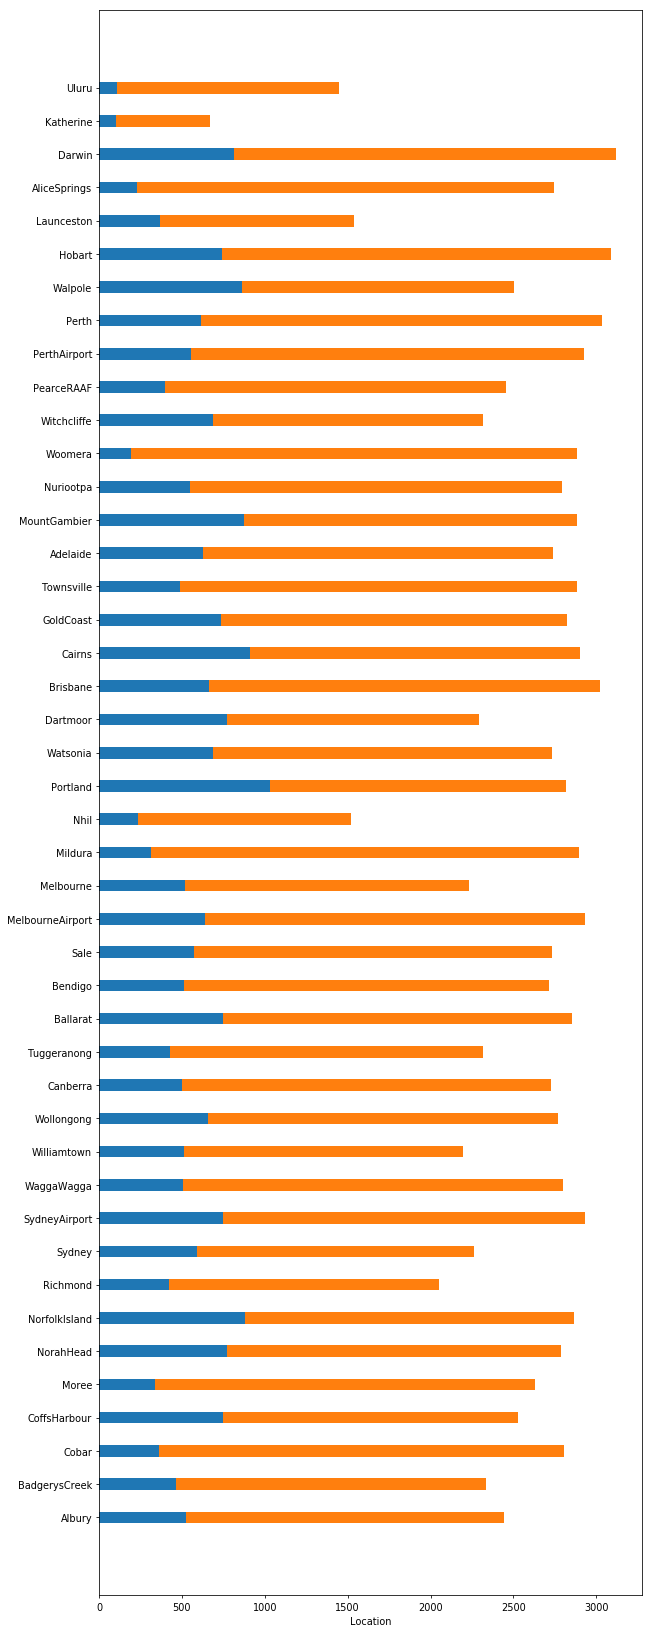

In [10]:
import matplotlib.pyplot as plt
import numpy as np

N = 44
location = df1_index
ind = np.arange(N)
width = 0.35
plt.figure(figsize=(10,30), dpi=70, facecolor='w', edgecolor='k')
p1 = plt.barh(location, rain, width)
p2 = plt.barh(location, norain, width, left = rain)
plt.xlabel('Location')
plt.show()

###1.2.6 Categorize Locations into 6 Groups based on Climatic Zones

In [11]:
Temperate = ['Albury','BadgerysCreek','Richmond','WaggaWagga','Williamtown','Ballarat','Sale','Melbourne','MelbourneAirport','Portland','Watsonia','Dartmoor','Adelaide','MountGambier','Nuriootpa','Witchcliffe','Walpole']
Grasslands = ['Cobar','Moree','Mildura','Nhil','AliceSprings']
Subtropical = ['CoffsHarbour','NorahHead','NorfolkIsland','Sydney','SydneyAirport','Wollongong','Brisbane','GoldCoast','PearceRAAF','Perth','PerthAirport']
Cooltemperate = ['Canberra','Tuggeranong','Bendigo','Hobart','Launceston']
Tropical = ['Cairns','Townsville','Darwin','Katherine']
Desert = ['Woomera','Uluru']

#print(len(Temperate))
#print(len(Grasslands))
#print(len(Subtropical))
#print(len(Cooltemperate))
#print(len(Tropical))
#print(len(Desert))

AllClimate = list([Temperate,Grasslands,Subtropical,Cooltemperate,Tropical,Desert])
print(len(AllClimate))


6


In [0]:
climate = df['Location'].tolist()
location_label = climate.copy()

#print(climate[10000:10050])

for i in range(len(climate)):
    for j in range(len(AllClimate)):
        if climate[i] in AllClimate[j]:
            location_label[i] = str(j+1)

len(location_label)
df['Location'] = location_label
#df.tail()

###1.2.7 Categorize Time based on Season

In [13]:
from datetime import datetime
format_str = '%Y/%m/%d' # The format

date = df['Date'].tolist()
datetime_obj = []

for date_str in date:
    date_obj = datetime.strptime(date_str, format_str).date()
    datetime_obj.append(date_obj)

datetime_obj[0:10]


[datetime.date(2008, 12, 1),
 datetime.date(2008, 12, 2),
 datetime.date(2008, 12, 3),
 datetime.date(2008, 12, 4),
 datetime.date(2008, 12, 5),
 datetime.date(2008, 12, 6),
 datetime.date(2008, 12, 7),
 datetime.date(2008, 12, 8),
 datetime.date(2008, 12, 9),
 datetime.date(2008, 12, 10)]

In [14]:
Winter = [12,1,2];
Spring = [3,4,5];
Summer = [6,7,8];
Fall = [9,10,11];
AllSeason = [Winter,Spring,Summer,Fall];
SeasonLabel = []

for date in datetime_obj:
    for i in range(len(AllSeason)):
        if date.month in AllSeason[i]:
            SeasonLabel.append(str(i))
                 
print(SeasonLabel[100:105])
print(datetime_obj[100:105])
df['Date'] = SeasonLabel
df.tail()

['1', '1', '1', '1', '1']
[datetime.date(2009, 3, 24), datetime.date(2009, 3, 25), datetime.date(2009, 3, 28), datetime.date(2009, 3, 31), datetime.date(2009, 4, 3)]


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2,6,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,0.0,0
142189,2,6,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,0.0,0
142190,2,6,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,0.0,0
142191,2,6,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,0.0,0
142192,2,6,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,0.0,0


##1.3 Balanced Sampling

###1.3.1 Balanced Sampling

In [15]:
# Divide by class
df_class_0 = df[df['RainTomorrow'] == 0]
df_class_1 = df[df['RainTomorrow'] == 1]
print(df_class_0.shape)
print(df_class_1.shape)

(87906, 20)
(25019, 20)


In [16]:
import pandas as pd
df_class_0_under = df_class_0.sample(25019)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print(df_class_0_under.shape)
print(df_test_under.shape)
df_test_under.head()

(25019, 20)
(50038, 20)


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
140677,1,6,24.3,39.7,0.0,S,46.0,E,SW,22.0,15.0,36.0,17.0,1007.9,1003.9,30.4,38.1,No,0.0,0
26894,0,1,20.9,36.6,0.0,ENE,39.0,N,ENE,7.0,17.0,64.0,31.0,1019.9,1013.8,24.6,36.0,No,0.0,0
18592,3,3,12.9,20.0,0.0,S,39.0,SSW,ESE,9.0,15.0,84.0,72.0,1024.1,1022.1,16.4,18.4,No,0.0,0
123908,0,1,14.9,23.2,0.0,W,50.0,SW,WNW,4.0,28.0,82.0,75.0,1003.8,1003.4,18.5,20.3,No,0.0,0
413,0,1,11.0,32.9,0.0,W,48.0,SSE,WNW,2.0,19.0,52.0,15.0,1011.8,1008.8,18.5,30.7,No,0.0,0


###1.3.2 Dummify Sample Dataset

In [17]:
df2 = pd.get_dummies(df_test_under.drop(['RISK_MM'],axis = 1))
df2.head()
print(df2.columns.tolist())
print(df2.shape)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow', 'Date_0', 'Date_1', 'Date_2', 'Date_3', 'Location_1', 'Location_2', 'Location_3', 'Location_4', 'Location_5', 'Location_6', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'Wind

###1.3.3 Split Training and Testing Dataset

In [18]:
y = df2['RainTomorrow'].values
import numpy as np
print(np.unique(y))

del df2['RainTomorrow']
X = df2.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3,
                            random_state=0)

[0 1]


##2. Apply Models

##2.1 Apply Machine Learning Models

Perceptron/
Logistic Regression/
Decision Tree/
Random Forest/
Neural Network/
Naive Bayes/
KNN

###2.1.1 Machine Learning Models with Pipeline

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
#from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

names = [
         "Perceptron",
         "LogisticRegression",
         #"Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         #"RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"
            ] 

classifiers = [ 
    Perceptron(),
    LogisticRegression(),
    #LinearSVC(C=1, dual=False),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    #SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)
                 ]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, 
                            random_state=0)

    
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
    
for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
                   #('pca', PCA(n_components = 5)),
                   ('clf', clf)])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)

    #clf.fit(X_train, y_train)
    #score = clf.score(X_test, y_test)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))

# Do you need PCA here? How's the performance with and without PCA?
# How can you find the best features? (Hint: RF)

Algo: Perceptron           and Score: 0.7373
Algo: LogisticRegression   and Score: 0.7940
Algo: Decision Tree        and Score: 0.7722
Algo: Random Forest        and Score: 0.7250
Algo: Neural Net           and Score: 0.8012
Algo: Naive Bayes          and Score: 0.6896
Algo: Nearest Neighbors    and Score: 0.6985


In [20]:
type(y_train)
print((y_train == 0).sum())
print((y_train == 1).sum())
print(len(y_train))

print((y == 0).sum())
print((y == 1).sum())

17476
17550
35026
25019
25019


###2.1.2 10-fold Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

for name, clf in zip(names, classifiers):
    # add pipeline to convert all data to StandardScale does it help?
    
    scores = cross_val_score(pipe, X, y, cv=10)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, np.mean(scores)))

Algo: Perceptron           and Score: 0.6379
Algo: LogisticRegression   and Score: 0.6379
Algo: Decision Tree        and Score: 0.6379
Algo: Random Forest        and Score: 0.6379
Algo: Neural Net           and Score: 0.6379
Algo: Naive Bayes          and Score: 0.6379
Algo: Nearest Neighbors    and Score: 0.6379


###2.1.3 Prediction Result and Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix

for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
    #               ('pca', PCA(n_components = 5)),
                   ('clf', clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
    print(confmat)

[[6217 1326]
 [3475 3994]]
[[5873 1670]
 [2344 5125]]
[[5395 2148]
 [1937 5532]]
[[5689 1854]
 [2178 5291]]
[[5674 1869]
 [1974 5495]]
[[5974 1569]
 [2622 4847]]
[[5444 2099]
 [2065 5404]]


In [0]:
# y_pred.shape

(15012,)

Total number of predictions: 15012


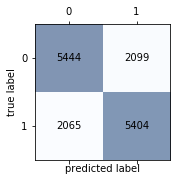

In [0]:
# fig, ax = plt.subplots(figsize=(2.5, 2.5))

# for i in range(confmat.shape[0]):
#     ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
#     for j in range(confmat.shape[1]):
#         ax.text(x=j, y=i, 
#                s = confmat[i,j],
#                 va='center', ha='center')
# plt.xlabel('predicted label')
# plt.ylabel('true label')
# print('Total number of predictions:', len(y_pred))

##2.2 PCA (2 Major Components)

Here we try to compare different classifier on our topics. We use 300 data for test and illustration. For the sake of simplicity, we adopt PCA in order to reduce the multiple dimension data to 2 dimension.

In [0]:
# Here we follow the standard process of PCA for data preparation for next step
sc = StandardScaler()
X_std = sc.fit_transform(X_train[:300])

cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
              for i in range(len(eigen_vals))]
eigen_pairs.sort(key=(lambda li:li[0]),reverse=True)

W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

X_pca = X_std.dot(W)

X_train_pca=X_pca[:200]
X_test_pca=X_pca[200:300]
y_train_pca=y_train[:200]
y_test_pca=y_train[200:300]


Here is a technical note: we transform complex number into float number for data visualization. We use this method since the imaginary part for all the data we use here is zero.

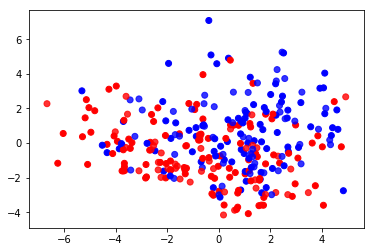

In [0]:
h=0.02
x_min, x_max = X_train_pca[:, 0].min() - .5, X_train_pca[:, 0].max() + .5
y_min, y_max = X_train_pca[:, 1].min() - .5, X_train_pca[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(float(x_min),float(x_max), h),
                         np.arange(float(y_min), float(y_max), h))
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train_pca, cmap=cm_bright)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test_pca, cmap=cm_bright, alpha=0.8)
plt.show()

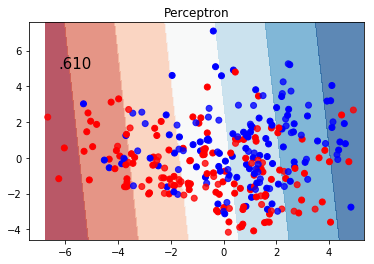

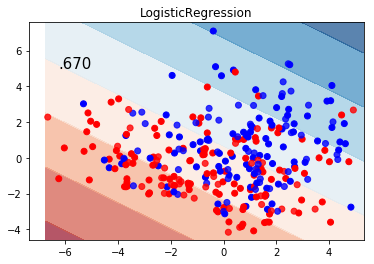

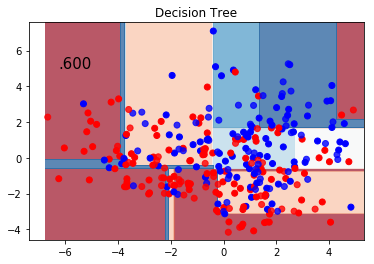

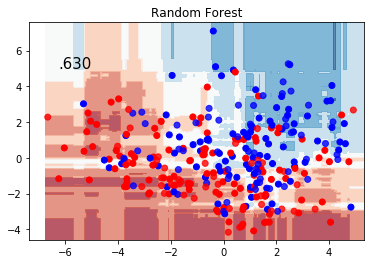

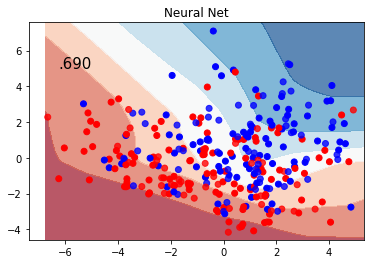

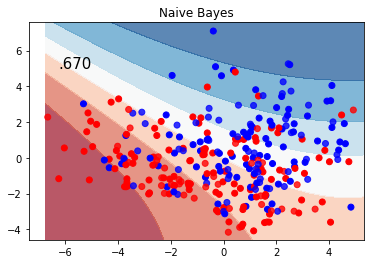

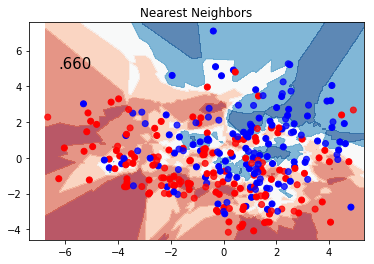

In [0]:
names = [
         "Perceptron",
         "LogisticRegression",
         #"Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         #"RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"
            ] 

classifiers = [ 
    Perceptron(),
    LogisticRegression(),
    #LinearSVC(C=1, dual=False),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    #SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)
                 ]
for name, clf in zip(names, classifiers):
    clf.fit(X_train_pca, y_train_pca)
    score = clf.score(X_test_pca, y_test_pca)
    if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.7)
    plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train_pca, cmap=cm_bright)
    plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test_pca, cmap=cm_bright, alpha=0.8)
    plt.title(name)
    plt.text(-5.,5.,('%.3f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
    plt.show()

We could easily see from the data: (1)PCA we used here could not represent our data very well (from the scatter plot without model contour);(2)It seems that Nearest Neighbors works the best, while the Perceptron and LogisticRegression do not work good.

## 2.3 Models with Bagging

###2.3.1 Models with Bagging

In [0]:
from sklearn.ensemble import BaggingClassifier

P = Perceptron()
LR = LogisticRegression()
DT = DecisionTreeClassifier(max_depth=5)
RF = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)
MLP = MLPClassifier(hidden_layer_sizes=(100,50), alpha=1)
NB = GaussianNB()
KNN = KNeighborsClassifier(5)

Bag_num = 5
bag_P = BaggingClassifier(base_estimator = P,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_LR = BaggingClassifier(base_estimator = LR,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_DT = BaggingClassifier(base_estimator = DT,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_RF = BaggingClassifier(base_estimator = RF,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_MLP = BaggingClassifier(base_estimator = MLP,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_NB = BaggingClassifier(base_estimator = NB,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_KNN = BaggingClassifier(base_estimator = KNN,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)

bag_classifiers = [ 
    bag_P,
    bag_LR,
    bag_DT,
    bag_RF,
    bag_MLP,
    bag_NB,
    bag_KNN
                 ]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, 
                            random_state=0)
    
bag_names = [
    'bag_P',
    'bag_LR',
    'bag_DT',
    'bag_RF',
    'bag_MLP',
    'bag_NB',
    'bag_KNN'
            ] 
    
pipeResults = []
AllScores = []
for name, clf in zip(bag_names, bag_classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
#                   ('pca', PCA(n_components = 5)),
                   ('clf', clf)])
    pipe.fit(X_train, y_train)
    pipeResults.append(pipe)
    score = pipe.score(X_test, y_test)
    AllScores.append(score)
    #clf.fit(X_train, y_train)
    #score = clf.score(X_test, y_test)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))



Algo: bag_P                and Score: 0.7347
Algo: bag_LR               and Score: 0.7842
Algo: bag_DT               and Score: 0.7676
Algo: bag_RF               and Score: 0.7339
Algo: bag_MLP              and Score: 0.7998
Algo: bag_NB               and Score: 0.6708
Algo: bag_KNN              and Score: 0.7296


###2.3.2 Prediction Results and Confusion Matrix

In [0]:
#for name, clf in zip(bag_names, bag_classifiers):
#     pipe = Pipeline( [ ('scl', StandardScaler()),
#                    ('pca', PCA(n_components = 5)),
#                    ('clf', clf)])
#     pipe.fit(X_train, y_train)
predicts = []
for i in range(len(pipeResults)):    
    y_pred = pipeResults[i].predict(X_test)
    predicts.append(y_pred)
    confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
    print(confmat)

[[5680 1863]
 [2119 5350]]
[[5956 1587]
 [1653 5816]]
[[5914 1629]
 [1860 5609]]
[[5805 1738]
 [2257 5212]]
[[6015 1528]
 [1478 5991]]
[[4962 2581]
 [2361 5108]]
[[5670 1873]
 [2186 5283]]


In [0]:
# df2.head()
# for col in df2.columns: 
#     print(col)
# type(pipeResults[0])
# type(predicts)

list

Total number of predictions: 15012


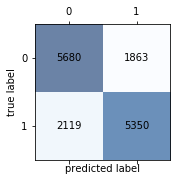

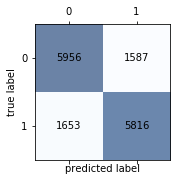

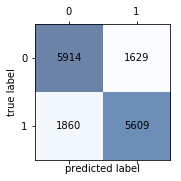

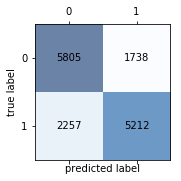

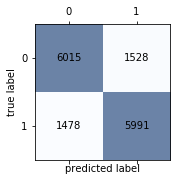

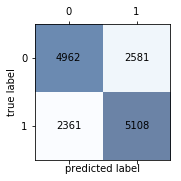

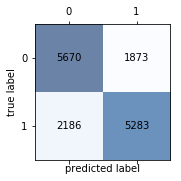

In [0]:
for k in range(len(predicts)):
    confmat = confusion_matrix(y_true = y_test, y_pred = predicts[k])
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.6)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, 
               s = confmat[i,j],
                va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
print('Total number of predictions:', len(y_pred))

###2.3.3 Prediction Results and ROC Curve

<Figure size 432x288 with 0 Axes>

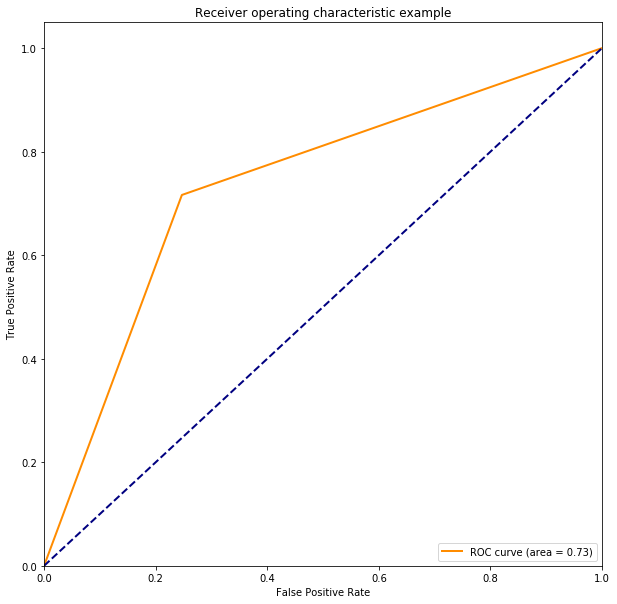

<Figure size 432x288 with 0 Axes>

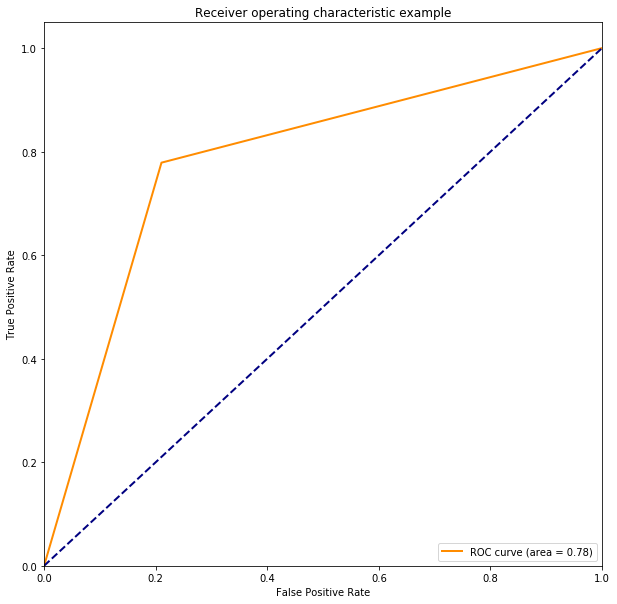

<Figure size 432x288 with 0 Axes>

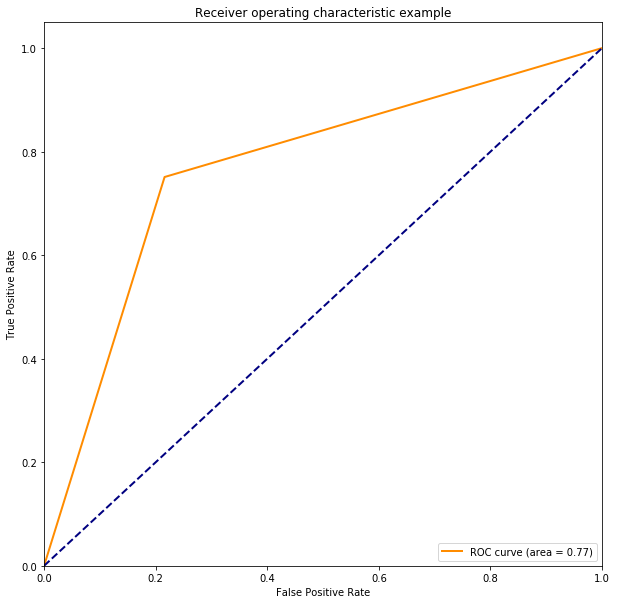

<Figure size 432x288 with 0 Axes>

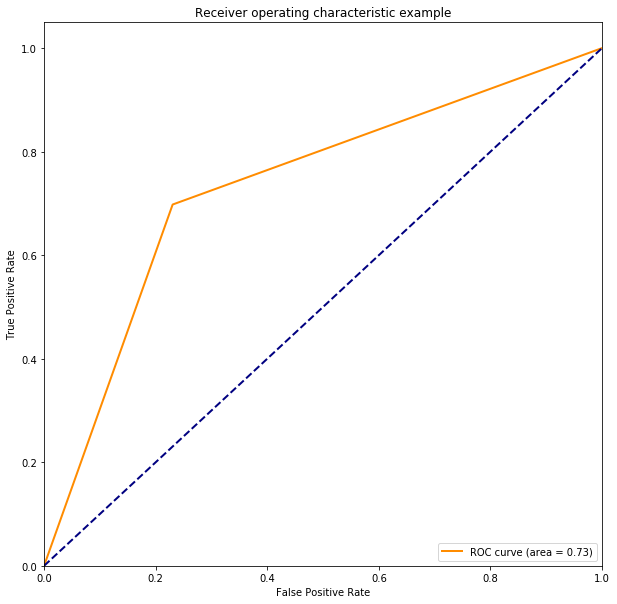

<Figure size 432x288 with 0 Axes>

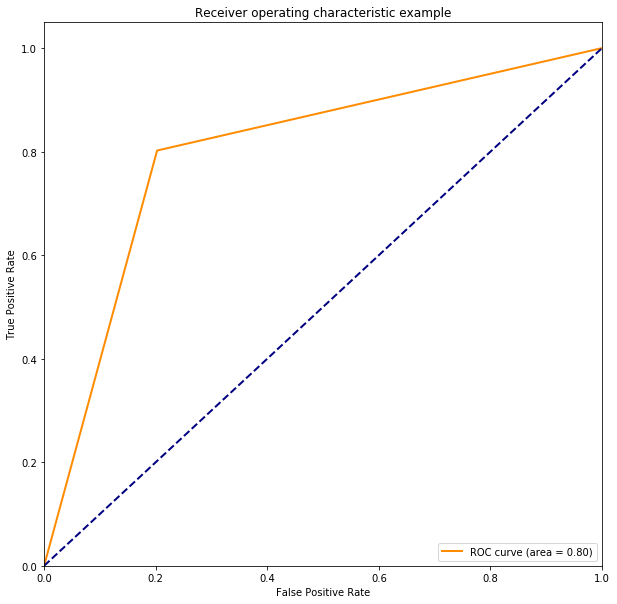

<Figure size 432x288 with 0 Axes>

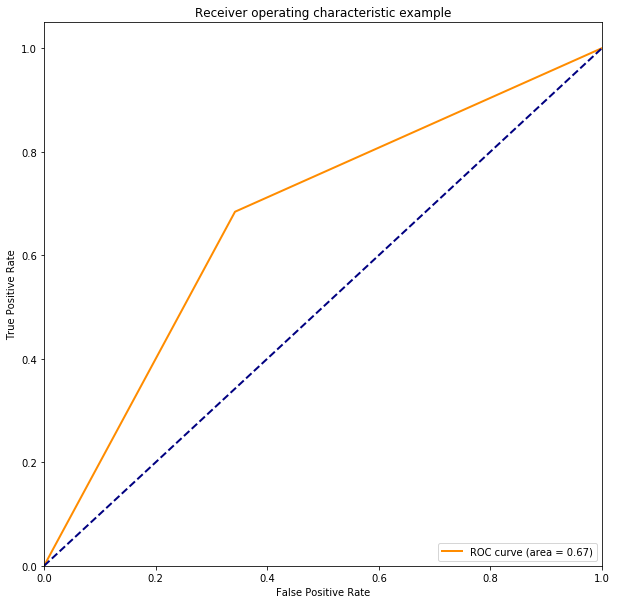

<Figure size 432x288 with 0 Axes>

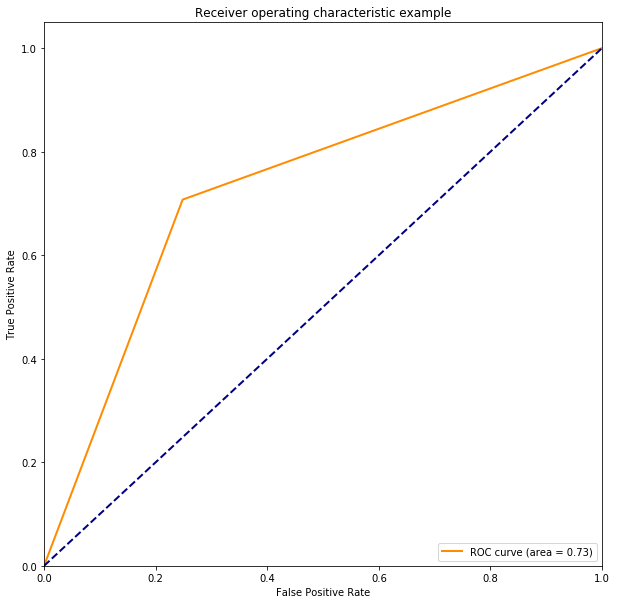

In [0]:
from sklearn.metrics import roc_curve, auc
# fig = plt.figure(figsize=(7,5))
# mean_tpr = 0.0
# mean_fpr = np.linspace(0,1,100)
# all_tpr= []

# for i, (train, test) in enumerate(cv):
#   probas = pipe_lr.fit(X_train2[train], 
#                        y_train[train]).predict_proba(X_train2[test])
#   fpr, tpr, thresholds = roc_curve(y_train[test], 
#                                   probas[:,1],
#                                   pos_label=1)
#   mean_tpr += interp(mean_fpr, fpr, tpr)
#   mean_tpr[0] = 0.0
#   roc_auc = auc(fpr, tpr)
#   plt.plot(fpr, tpr, 
#           label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
  

# plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guess')

# mean_tpr /= len(cv)
# mean_tpr[-1] = 1.0

# mean_auc = auc(mean_fpr, mean_tpr)

# plt.plot(mean_fpr, mean_tpr, 'k--',
#         label = 'mean ROC (area = %0.2f)' % mean_auc, lw=2)

# plt.plot([0,0,1], [0,1,1], linestyle=':', color='black', label='perfect performance')

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.legend(loc='lower right')
# plt.show()

for i in range(len(predicts)):
    fpr, tpr, thresholds  =  roc_curve(y_test, predicts[i])
    roc_auc =auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()